#**HomeWork 2**
**Universidad de Monterrey**

Marcelo Garza Rdz.

Ing. en Gestión Empresarial

Dr Andrés Hernández Gutiérrez

Monterrey, Nuevo León México | 08/30/2024

------------------------------------------------------------------------

1.
Esta primer celda se utiliza para importar las librerias, se recomienda nombrar las librerias con un nombre mas corto para llamarles durante el resto del codigo.

Las librerias que se importan para esta tarea son:
 numpy
 pandas
 tensorflow
 matplotlib.pyplot
 sklearn.model_selection

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2. En la siguiente linea de codigo, creamos la función "generate_data", con los siguientes parametros:

true_coeffs = np.array([10,1])-> Arreglo que contiene los coeficientes de la ecuación.

noise_std=2 -> Tiene que ver con la aleatoriedad (ruido) que se le dera a los datos generados, en este caso tiene una desviación estandar de 2.

num_samples=100 -> Pide que se generen 100 datos.

Despues se fija una semilla (np.random.seed(4500)), simplemente es para la repetitividad de los valores.

Despues creamos los datos

x = np.arrange(0,100,1) -> Crea un arreglo que empieza en 0, termina en 100 e incrementa de 1 en 1.

y = true_coeffs[0]+true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples) -> Se crea un arreglo "y", usando true_coeffs*x y despues se le añade ruido.

Por ultimo pedimos el retorno (x,y)

Entonces esta funcion se usa para generar datos, que tratan de imitar datos reales con ruido.

In [ ]:
def generate_data(true_coeffs=np.array([10,1]), noise_std=2, num_samples=100):

  #Semilla
  np.random.seed(4500)


  #Crear data
  x = np.arange(0,100,1)
  y = true_coeffs[0]+true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

  #Regresa los datos
  return(x,y)

Ya teniendo la función para generar los datos, procedemos a crearlos.

true_coeffs = np.array([10,1]) -> Se usa para almacenar un arreglo.

noise_std = 5 -> Define el ruido.

x,y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100) -> Utiliza la función creada en la linea previa para generar 100 datos.

In [ ]:
#Genera una dataset sintetico
true_coeffs = np.array([10,1])
noise_std = 5
x,y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

Ya teniendo los datos, procedemos a graficarlos:
Usamos una grafica de Scatter, y le mandamos x,y, y etiquetamos los valores como Synthtic dataset.

Establecemos las etiquetas de los ejes.

Y creamos un titulo para la grafica.

---





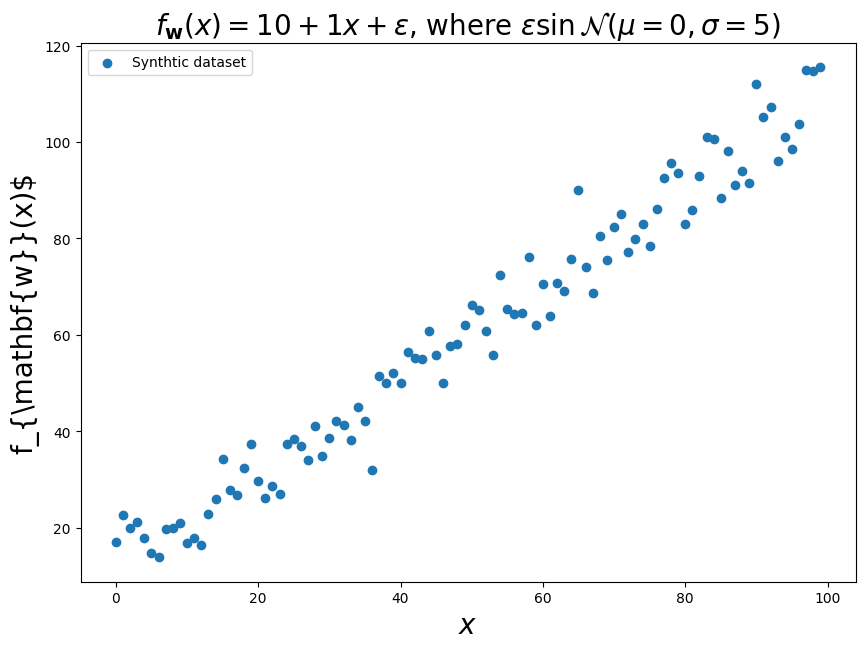

In [ ]:
#Crear visualizaciones de el dataset
plt.figure(figsize=(10,7))
plt.scatter(x,y,label='Synthtic dataset')
plt.xlabel(r"$x$",fontsize=20)
plt.ylabel("f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x +\epsilon$, where $\epsilon \sin \mathcal{{N}}(\mu=0, \sigma={noise_std})$",fontsize=20)

plt.legend()
plt.legend()

Para el siguiente codigo.

Usamos train_test_split, que viene de la libreria previamente importada, sklearn_modelo.selection; esto nos permite entregarle x ,y y que nos lo divida en datos para entrenamiento y prueba, pedimos que el tamaño de prueba sea del 20%, ponemos una semilla (random_state), y por ultimo activamos "shuffle", lo que le indica a la función que agarre los datos de prueba de cualquier parte de la base.

Y posteriormente generamos la misma grafica del codigo anterior, con la diferencia de que para esta graficamos tanto los datos de prueba como los de entrenamiento.


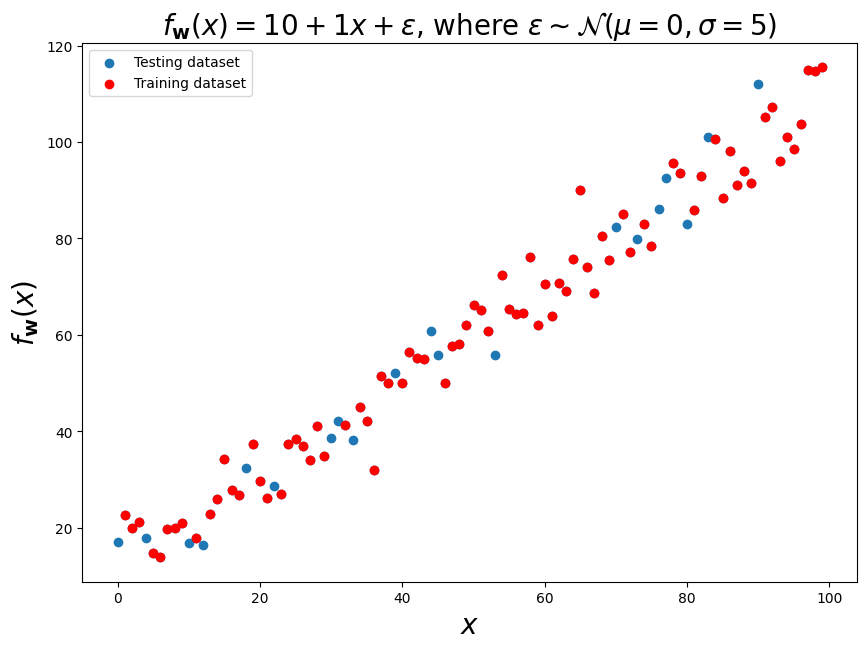

In [ ]:
#Separar la data en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, shuffle=True)

# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

Una vez teniendo los datos listos y separados, podemos crear el modelo.

Primero lo definimos como "model" y enviamos desde tf.keras primero "Sequential", que sera como el "molde" para crear el modelo, a este "molde" le enviamos "layers.input(shape=(1,))" que indica que el modelo va a recibir informacion de una sola dimension, en este caso x; Despues agregamos "layers.dense(1))" Añade una capa densa de una sola neurona.

Para despues compilar el modelo.


Use la siguiente referencia para entender un poco mejor el funcionamiento de la biblioteca:
La API funcional "Keras" en TensorFlow. (n.d.). TensorFlow. https://www.tensorflow.org/guide/keras/functional?hl=es-419



In [ ]:
# Crear el modelo de regresion lineal,

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

#Compilar el modelo
model.compile(optimizer='adam', loss='mse')

Usamos model.summary() para que nos entregue un resumen del funcionamiento del modelo, nos dice, cuantas capas tiene, cual es el output y cuantos parametros tiene.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Ya teniendo el modelo, procedemos a entrenarlo.

Utilizamos model.fit y declaramos:
Se use como datos, x_train y y_train, es decir el 80% de los datos, sin el 20% que separamos para probar.
Declaramos las epocas (epochs, iteraciones) como 500.

Despues utilizamos batch_size para dividir los datos en grupos de 10.

(Validation_split=10) Separamos un 10% de los datos enviados para que conforme se este realizando el entrenamiento, se comparen los datos contra este 10% y evitar overfiting.

Verbose=1, nos indica que tanta informacion mostrara mientras se realiza el entrenamiento.

Despues

Usamos model.evaluate, para comparar los datos entrenados vs los datos de prueba que habiamos separado previamente.

In [ ]:
#Entrenamos el modelo
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

#Evaluamos el modelo
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 13942.1426 - val_loss: 19506.6035
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 13547.1416 - val_loss: 19368.2070
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11776.3193 - val_loss: 19237.1289
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 15975.4697 - val_loss: 19096.4551
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14433.6094 - val_loss: 18958.9473
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13395.6514 - val_loss: 18827.0117
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15032.9707 - val_loss: 18700.3711
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13070.7900 - val_loss: 18578.9785
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14159.0752 - val_loss: 18449.1289
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13384.5596 - val_loss: 18319.9473
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11744.0332 - val_lo

Imprimimos los pesos y sesgos del modelo.

In [ ]:
#Imprimir los pesos del modelo entrenado
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[1.0796196]]
Biases [w0]: [2.235974]


Hacemos predicciones

In [ ]:
#Hacer predicciones
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
y_pred_train = model.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Graficamos el modelo como una linea para ver de manera grafica la disperción de los datos.

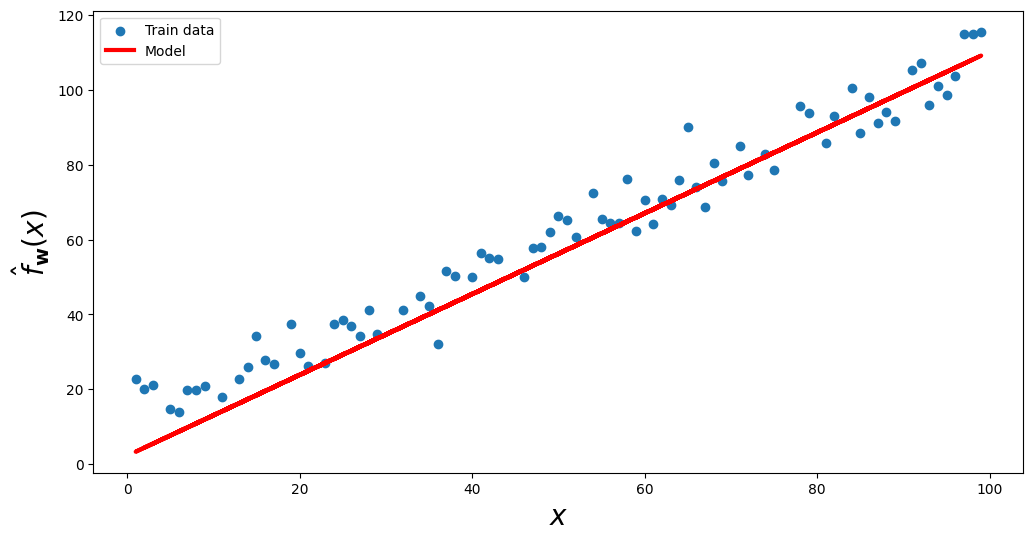

In [ ]:
#Graficamos el resultado
plt.figure(figsize=(12,6))

plt.scatter(x_train, y_train, label='Train data')
plt.plot(x_train, y_pred_train, label="Model", linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt.legend()

#Conclusión

Para alguien que no esta muy familiarizado con temas de programación y donde terminos de inteligencia artificial pueden llegar a asustar en un principio, creo que la biblioteca de keras, me permitio comprender la construcción de una RN de manera muy amigable y reproducible, no obstante, entiendo que existe todo un mundo de posibilidades que pueden mejorar el modelo, me queda la intriga por adentrarme a este entorno.

#Referencia

La API funcional "Keras" en TensorFlow. (n.d.). TensorFlow. https://www.tensorflow.org/guide/keras/functional?hl=es-419

"Durante la preparación de este trabajo, utilicé ChatGPT con el fin de solicitar explicaciones de terminos y secciones del codigo, con un lenguaje que fuera mas entendible para alguien con poca experiencia programando. Después de usar esta herramienta/servicio, revisé  y edité  el contenido según fuera necesario y asumo la plena responsabilidad del contenido de la entrega."
